In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df=pd.read_csv("/kaggle/input/yulu-hypothesis-testing/bike_sharing.csv")

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.shape

(10886, 12)

In [7]:
df["datetime"]=pd.to_datetime(df["datetime"])

In [8]:
cat_col=["season","holiday","workingday","weather"]
for col in cat_col:
    df[col]=df[col].astype("object")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [10]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [11]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
df.value_counts()

datetime             season  holiday  workingday  weather  temp   atemp   humidity  windspeed  casual  registered  count
2011-01-01 00:00:00  1       0        0           1        9.84   14.395  81        0.0000     3       13          16       1
2012-05-01 21:00:00  2       0        1           1        26.24  30.305  65        8.9981     31      251         282      1
2012-05-01 13:00:00  2       0        1           2        29.52  33.335  51        15.0013    41      208         249      1
2012-05-01 14:00:00  2       0        1           2        30.34  33.335  48        16.9979    37      167         204      1
2012-05-01 15:00:00  2       0        1           2        30.34  33.335  45        15.0013    48      186         234      1
                                                                                                                           ..
2011-09-02 04:00:00  3       0        1           1        24.60  28.030  83        6.0032     2       2           4       

<Axes: ylabel='count'>

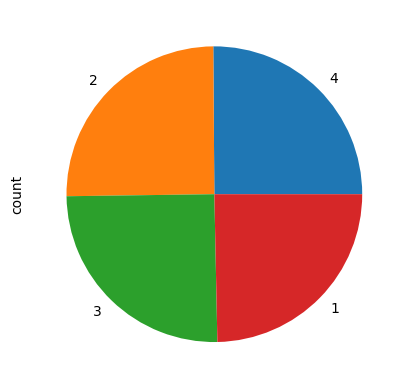

In [13]:
df["season"].value_counts().plot.pie()

<Axes: ylabel='count'>

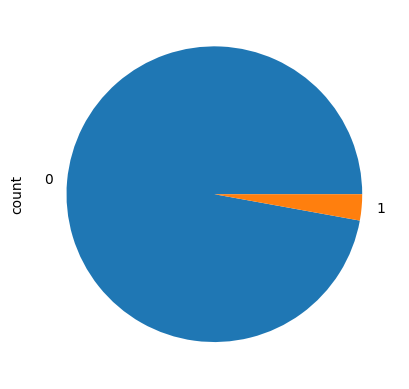

In [14]:
df["holiday"].value_counts().plot.pie()

<Axes: ylabel='count'>

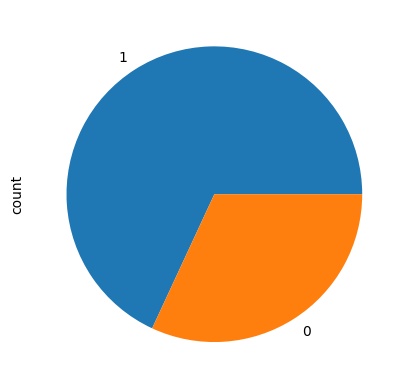

In [15]:
df["workingday"].value_counts().plot.pie()

<Axes: ylabel='count'>

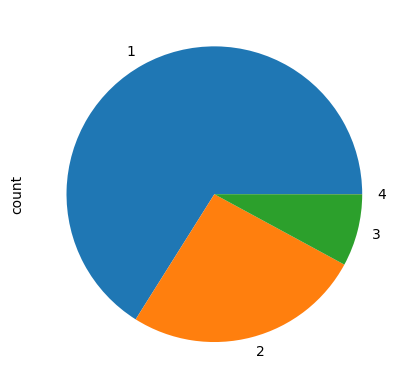

In [16]:
df["weather"].value_counts().plot.pie()

In [17]:
print(df["datetime"].max(),df["datetime"].min())

2012-12-19 23:00:00 2011-01-01 00:00:00


In [18]:
df[cat_col].melt().groupby(["variable","value"])[["value"]].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

In [19]:
# Univartate analysics

In [20]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**EDA**

In [21]:
num_col=["temp","atemp",'humidity',"windspeed","casual","registered","count"]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

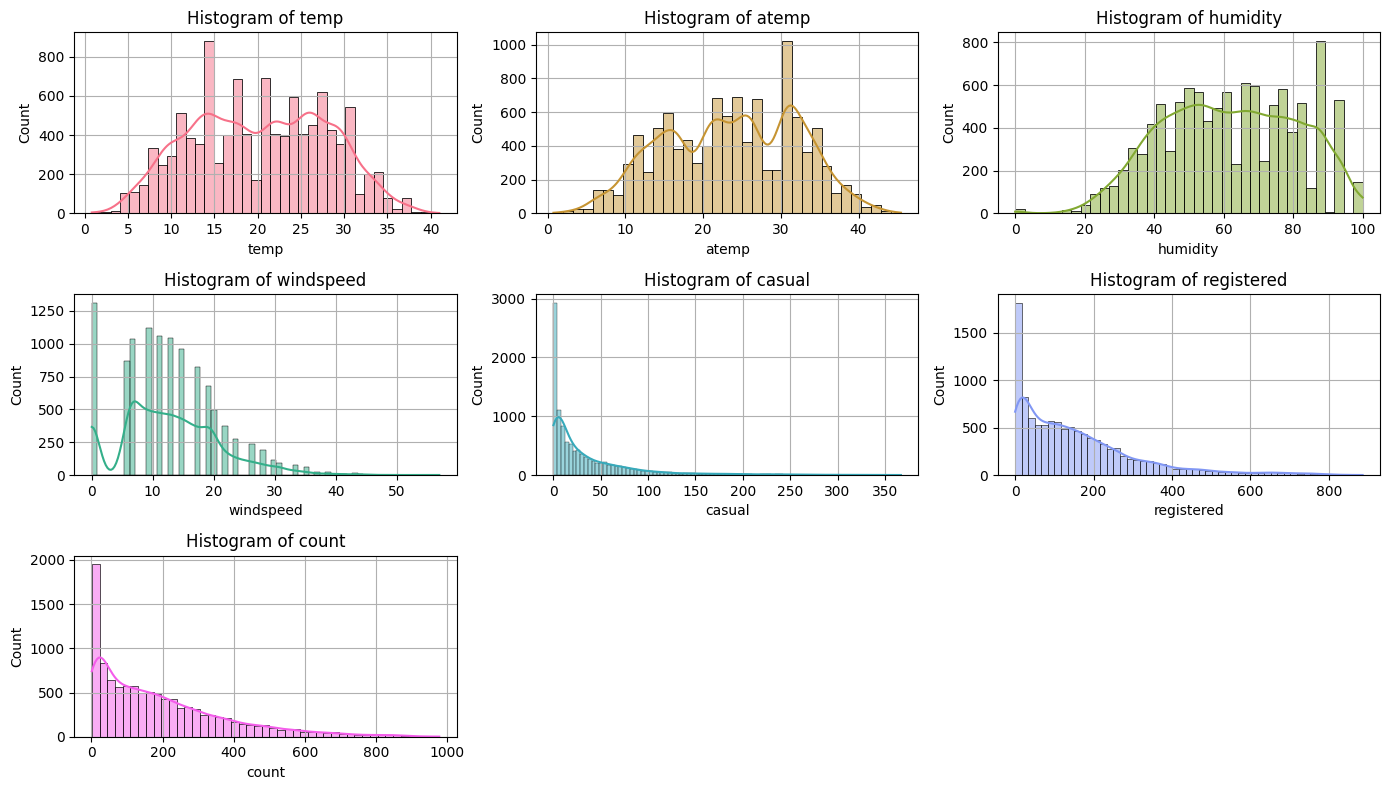

In [22]:
n_cols = 3  # Number of columns per row
n_rows = -(-len(num_col) // n_cols)  # Calculate rows dynamically

# Set up figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 8))
axes = axes.flatten()  # Flatten to easily index subplots

# Define a color palette
colors = sns.color_palette("husl", len(num_col))  # Using 'husl' for diverse colors

# Loop through numerical columns and plot histograms
for i, col in enumerate(num_col):
    sns.histplot(df[col], ax=axes[i], kde=True, color=colors[i])
    axes[i].set_title(f'Histogram of {col}', fontsize=12)
    axes[i].grid(True)

# Hide any empty subplots (if columns < grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

there is no normal distribution in the dataset 

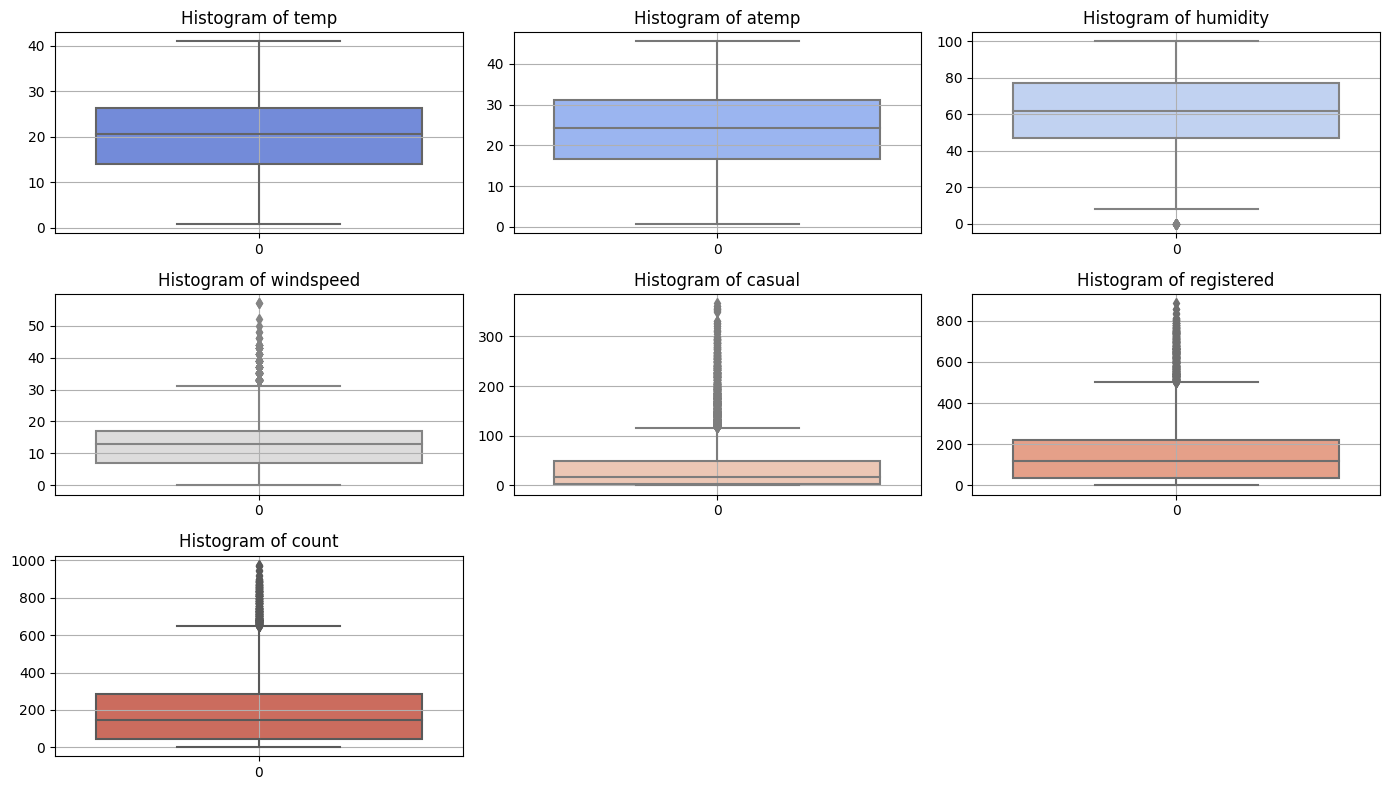

In [23]:
n_cols = 3  # Number of columns per row
n_rows = -(-len(num_col) // n_cols)  # Calculate rows dynamically

# Set up figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 8))
axes = axes.flatten()  # Flatten to easily index subplots

# Define a color palette
colors = sns.color_palette("coolwarm", len(num_col))  # Using 'husl' for diverse colors

# Loop through numerical columns and plot histograms
for i, col in enumerate(num_col):
    sns.boxplot(df[col], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Histogram of {col}', fontsize=12)
    axes[i].grid(True)

# Hide any empty subplots (if columns < grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

lot of ouliers present in the dataset

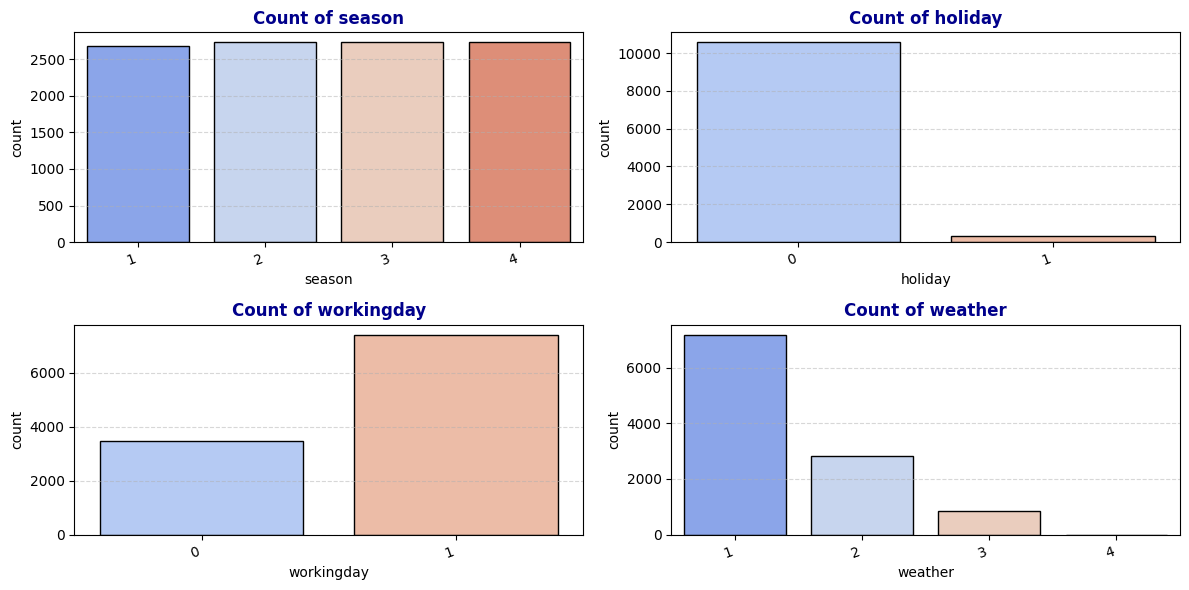

In [24]:
n_cols = 2  # Number of plots per row
n_rows = -(-len(cat_col) // n_cols)  # Dynamic row calculation

# Set up figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))
axes = axes.flatten()  # Flatten for easy indexing

# Use the 'pastel' color palette for soft aesthetics
colors = sns.color_palette("pastel", len(cat_col))

# Loop through categorical columns and create bar plots
for i, col in enumerate(cat_col):
    sns.countplot(x=df[col], ax=axes[i], palette="coolwarm", edgecolor="black")
    
    # Improve title readability
    axes[i].set_title(f'Count of {col}', fontsize=12, fontweight="bold", color='darkblue')
    
    # Rotate x labels if needed
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20, ha='right')
    
    # Add grid for better readability
    axes[i].grid(axis='y', linestyle="--", alpha=0.5)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

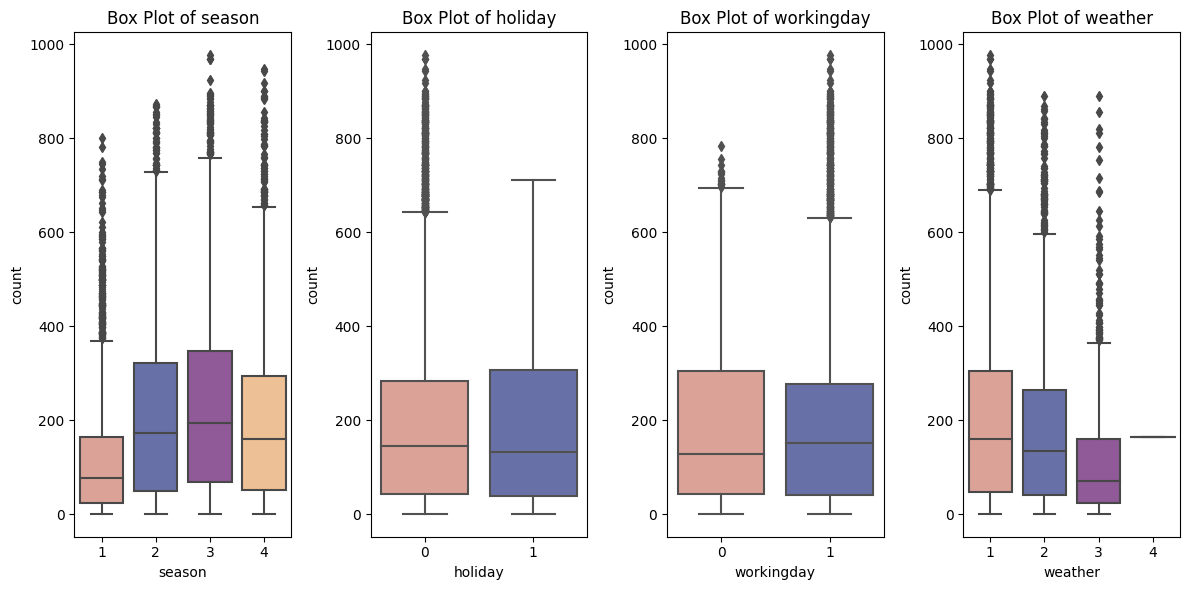

In [25]:
# Define a custom color palette
colors = ['#E69A8DFF', '#5D69B1FF', '#984EA3FF', '#FDC086FF', '#377EB8FF', '#4DAF4AFF'] 

# Create box plots for each categorical column
fig, axes = plt.subplots(1, len(cat_col), figsize=(12, 6))

for i, col in enumerate(cat_col):
    sns.boxplot(x=col, y='count', data=df, ax=axes[i], palette=colors)
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

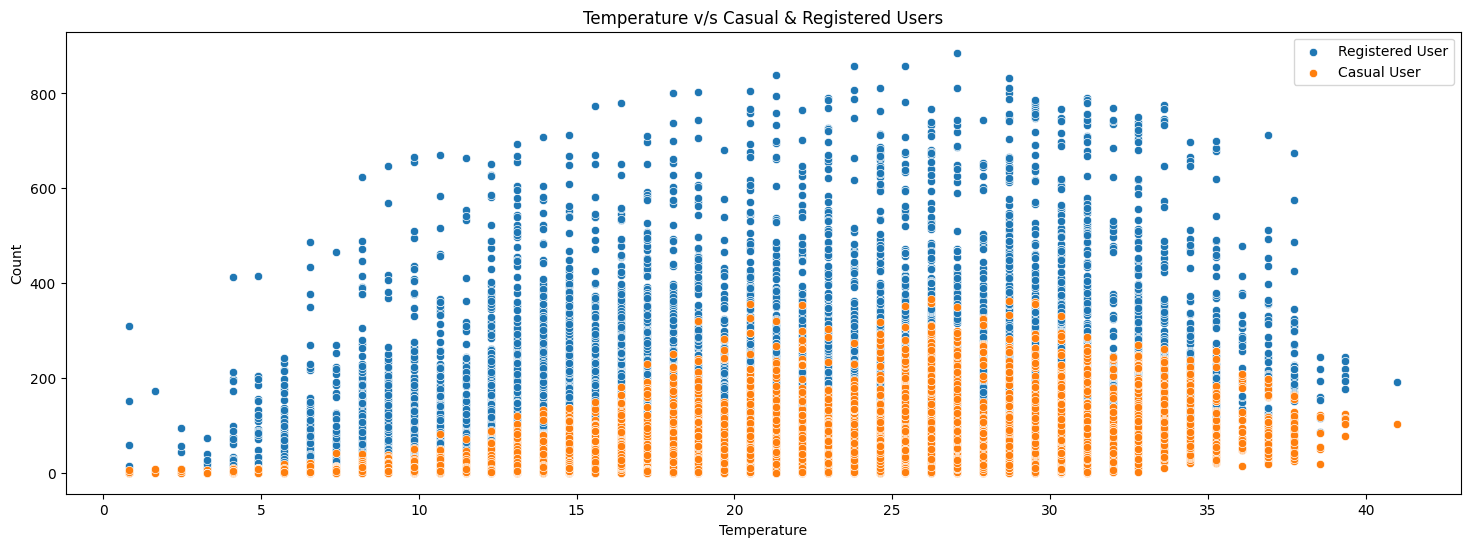

In [26]:
# Plot visualizing difference between casual user and registered user wrt to Temperature
plt.figure(figsize=(18, 6))

sns.scatterplot(x ="temp",y = "registered",data = df,label = "Registered User")
sns.scatterplot(x="temp", y="casual", data=df,label = "Casual User")

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature v/s Casual & Registered Users')
plt.legend()
plt.show()

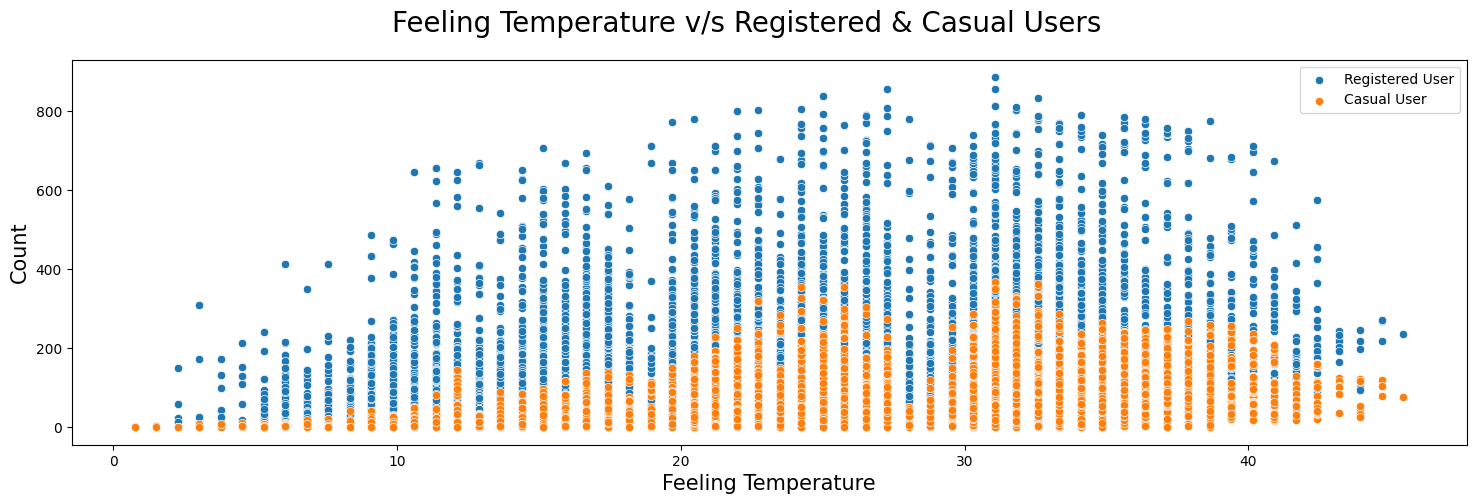

In [27]:
plt.figure(figsize = (18,5))

sns.scatterplot(x = "atemp",y = "registered",data = df,label ="Registered User")
sns.scatterplot(x = "atemp",y = "casual",data = df,label = "Casual User")
plt.suptitle("Feeling Temperature v/s Registered & Casual Users",fontsize = 20)
plt.xlabel("Feeling Temperature",fontsize= 15)
plt.ylabel("Count",fontsize= 15)
plt.show()

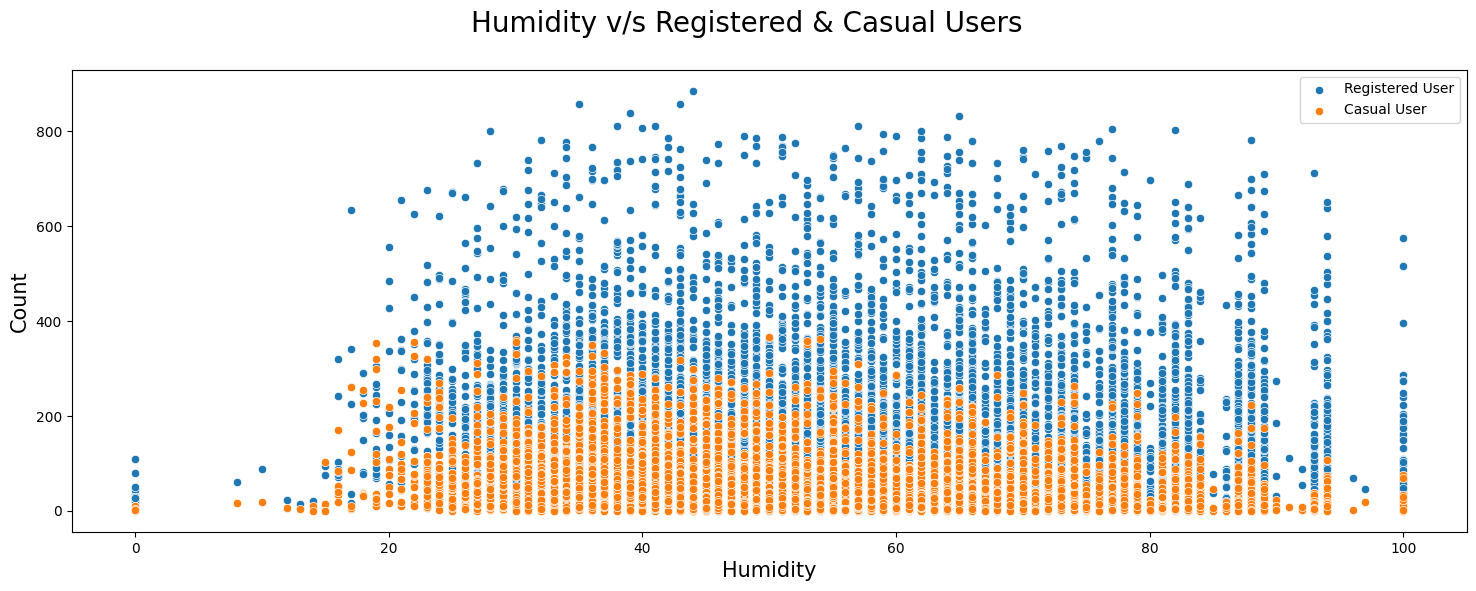

In [28]:
plt.figure(figsize = (18,6))
sns.scatterplot(x = "humidity",y = "registered",data =df,label = "Registered User")
sns.scatterplot(x = "humidity",y = "casual",data = df,label = "Casual User")
plt.suptitle("Humidity v/s Registered & Casual Users",fontsize = 20)
plt.xlabel("Humidity",fontsize= 15)
plt.ylabel("Count",fontsize= 15)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

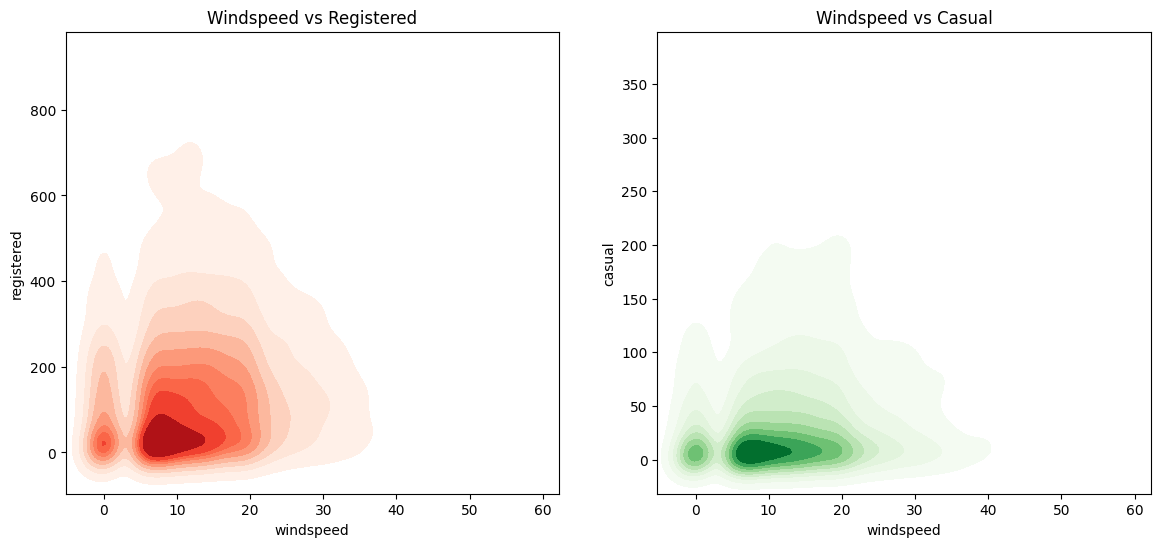

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(data=df, x="windspeed", y="registered", fill=True, cmap='Reds', ax=axes[0])
sns.kdeplot(data=df, x="windspeed", y="casual", fill=True, cmap='Greens', ax=axes[1])

axes[0].set_title("Windspeed vs Registered")
axes[1].set_title("Windspeed vs Casual")

plt.show()

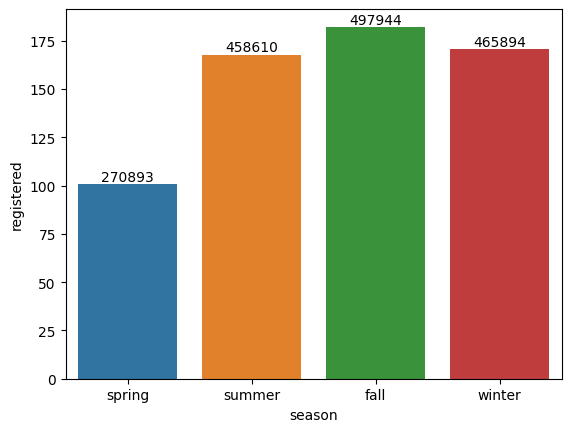

In [30]:
# Count of Registered User WRT To Season
s_map = {1 : "spring",2 : "summer",3 : "fall",4:"winter"}
ax1 = sns.barplot(data=df, x="season", y="registered", errorbar=None)
ax1.set_xticklabels([s_map[i] for i in range(1,5)])
for  i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,height,df[df["season"] == i+1]["registered"].sum(),  ha="center", va="bottom", fontsize=10)
plt.show()

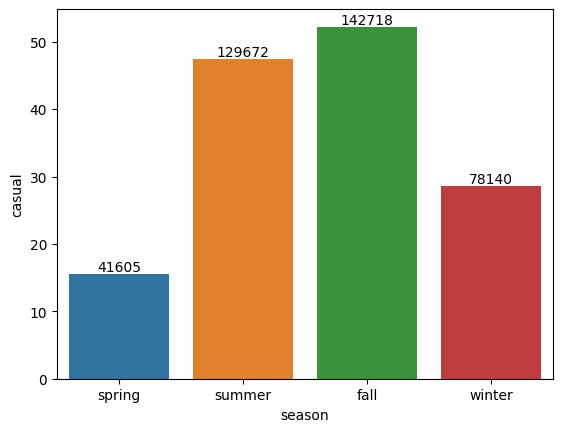

In [31]:
# Count of Casual Users WRT to Season

ax2 = sns.barplot(data=df,x="season",y="casual",errorbar=None)
ax2.set_xticklabels([s_map[i] for i in range(1,5)])

for  i, p in enumerate(ax2.patches):
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2.,height,df[df["season"] == i+1]["casual"].sum(),  ha="center", va="bottom", fontsize=10)

plt.show()

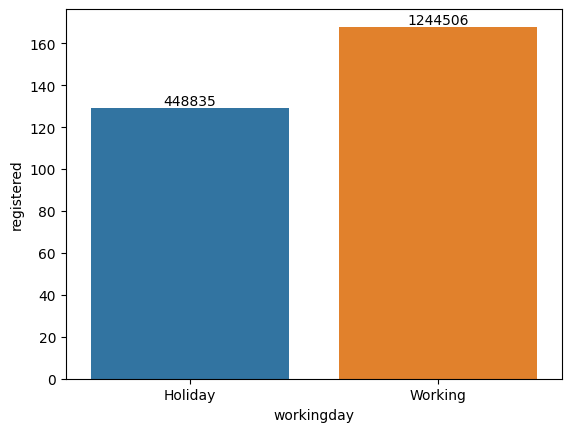

In [32]:
# 0 : Holiday , 1 : Working Day # Registered User
work_map = {0 : "Holiday",1 : "Working"}
ax3 = sns.barplot(data = df,x = "workingday",y = "registered",errorbar = None)
ax3.set_xticklabels([work_map[i] for i in range(0,2)])
for i,p in enumerate(ax3.patches):
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width()/2.,height,df[df["workingday"]== i]["registered"].sum(),ha="center",va = "bottom",fontsize = 10)

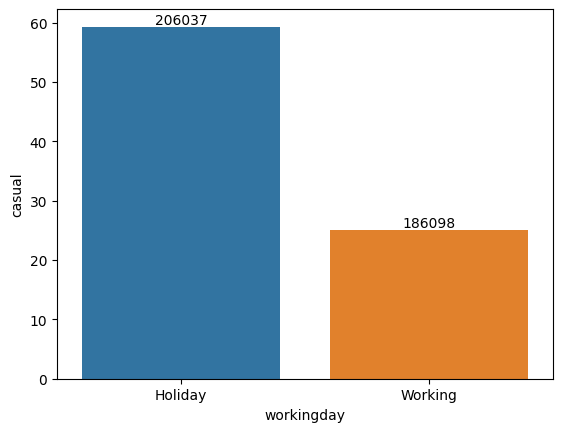

In [33]:
# 0 : Holiday , 1 : Working Day # Casual User
ax3 = sns.barplot(data = df,x = "workingday",y = "casual",errorbar = None)
ax3.set_xticklabels([work_map[i] for i in range(0,2)])
for i,p in enumerate(ax3.patches):
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width()/2.,height,df[df["workingday"]== i]["casual"].sum(),ha="center",va = "bottom",fontsize = 10)

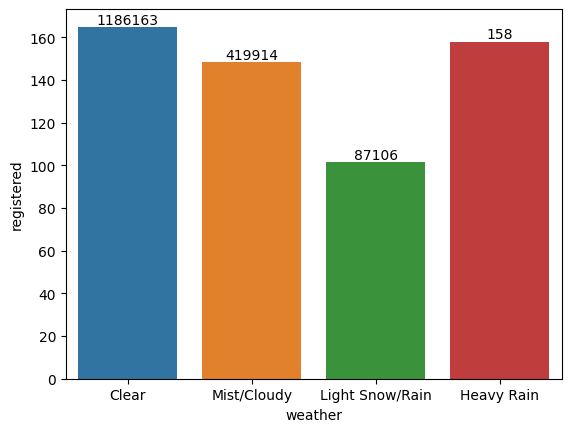

In [34]:
# Count with respect to Weather : 1-> Clear or Few Clouds , 2-> Mist+Cloudy , 3->Light Snow or Light Rain, 4->Heavy Rain
w_map = {1 : "Clear",2:"Mist/Cloudy",3:"Light Snow/Rain",4:"Heavy Rain"}

ax4 = sns.barplot(data=df,x = "weather",y="registered",errorbar=None)
ax4.set_xticklabels([w_map[i] for i in range(1, 5)])

for i,p in enumerate(ax4.patches):
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width()/2,height,df[df["weather"] == i+1]["registered"].sum(),ha="center",va="bottom",fontsize = 10)

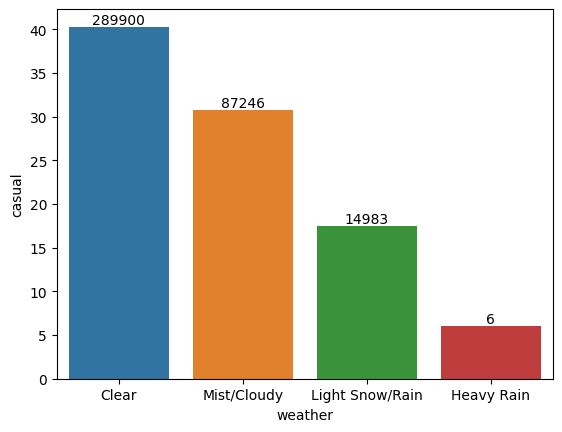

In [35]:
# Count with respect to Weather : 1-> Clear or Few Clouds , 2-> Mist+Cloudy , 3->Light Snow or Light Rain, 4->Heavy Rain
ax4 = sns.barplot(data=df,x = "weather",y="casual",errorbar=None)
ax4.set_xticklabels([w_map[i] for i in range(1, 5)])

for i,p in enumerate(ax4.patches):
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width()/2,height,df[df["weather"] == i+1]["casual"].sum(),ha="center",va="bottom",fontsize = 10)

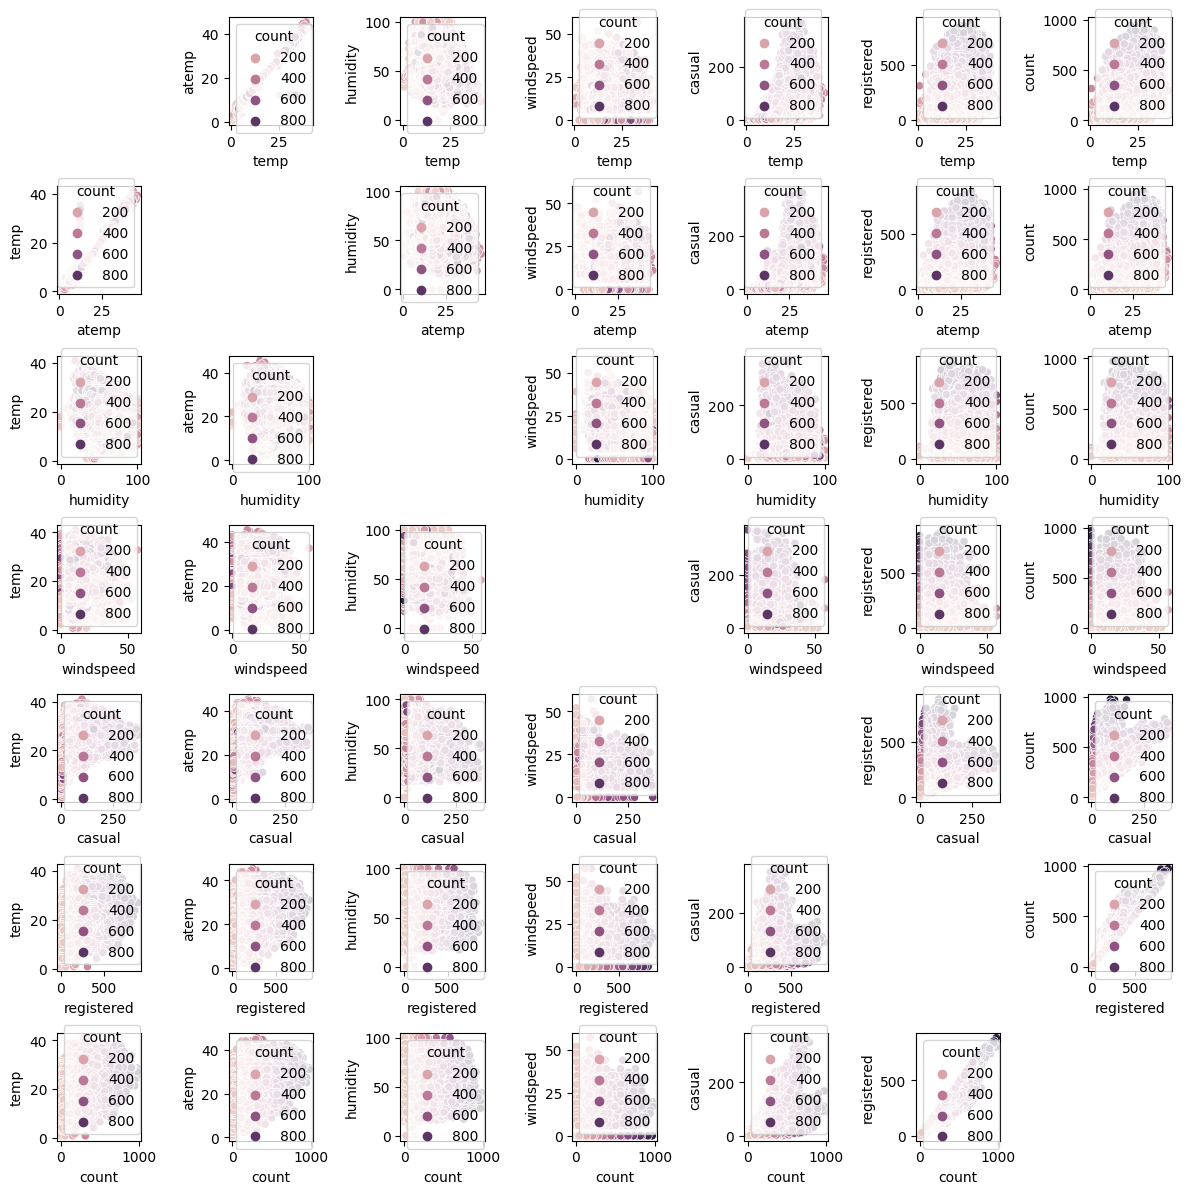

In [36]:
# Create scatter plots for each pair of numerical columns
fig, axes = plt.subplots(len(num_col), len(num_col), figsize=(12, 12))

for i, col1 in enumerate(num_col):
    for j, col2 in enumerate(num_col):
        if i != j:  # Avoid plotting a column against itself
            sns.scatterplot(x=col1, y=col2, data=df, hue='count', ax=axes[i, j])  # Use color encoding if you have a categorical column
        else:
            axes[i, j].axis('off')  # Hide diagonal plots

plt.tight_layout()
plt.show()

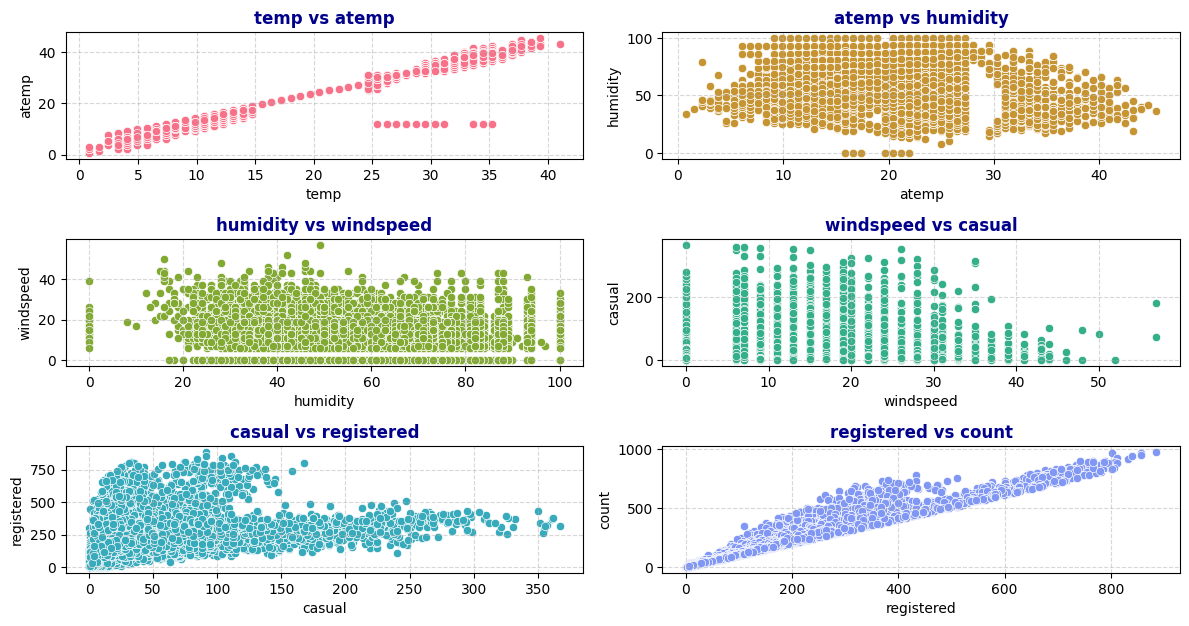

In [37]:
n_cols = 2  # Number of columns per row
n_rows = -(-len(num_col) // n_cols)  # Calculate rows dynamically

# Set up figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten for easy indexing

# Use a Seaborn color palette
colors = sns.color_palette("husl", len(num_col))

# Loop through numerical columns and create scatter plots
for i in range(len(num_col) - 1):  # Exclude last column to avoid index error
    sns.scatterplot(x=df[num_col[i]], y=df[num_col[i + 1]], ax=axes[i], color=colors[i])
    
    # Improve readability
    axes[i].set_title(f'{num_col[i]} vs {num_col[i + 1]}', fontsize=12, fontweight="bold", color='darkblue')
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Hide extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

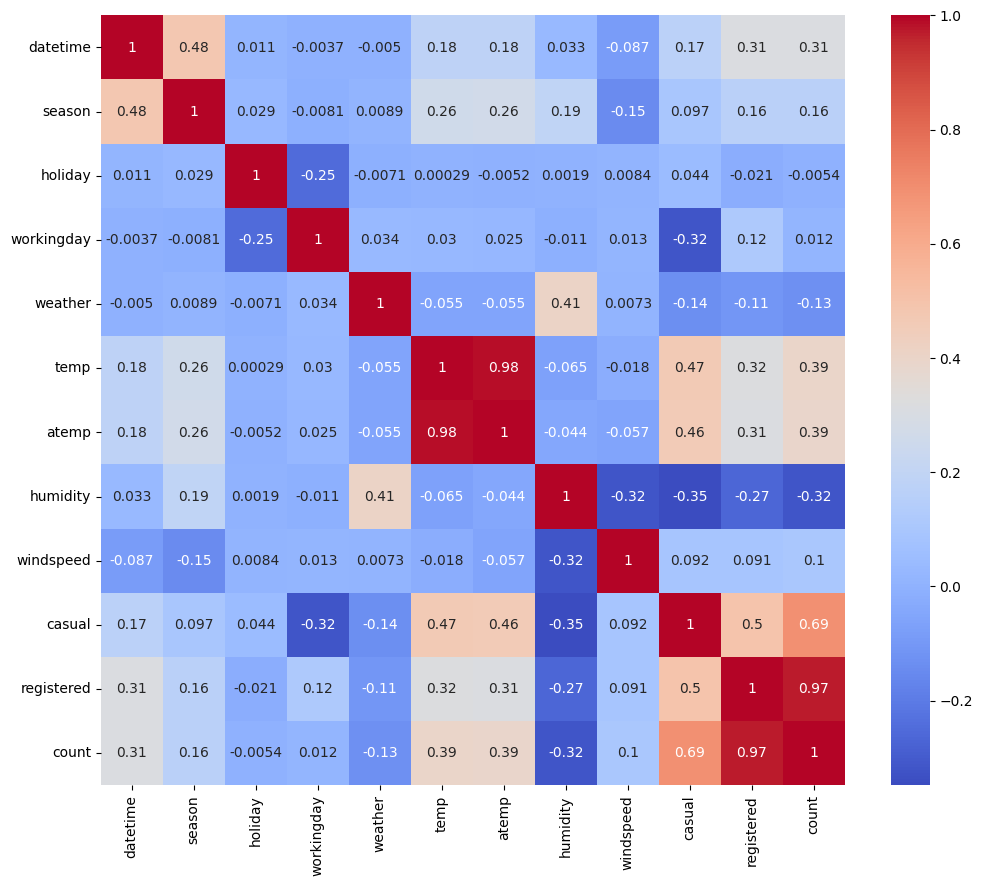

In [38]:
plt.figure(figsize=(12, 10))
df.corr()['count']
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [39]:
# Working day is divided into two parts 0 : Holiday and 1 : working day and we have to check if there is difference in count 
# Imagine 0 and 1 Are our A and B Group 
def AB_Test(df,group,target):
    
    # splitting A and B
    grpA = df[df[group] == 0][target]
    grpB = df[df[group] == 1][target]
    # shapiro test to check the normality
    # shapiro returns t_statistic and p-value
    # compare p value
    ntA = shapiro(grpA)[1] < 0.05
    ntB = shapiro(grpB)[1] < 0.05
    
    if (ntA == False) & (ntB == False):
        
        # Levene Test : To check for equal Variance from populations
        leveneTest = stats.levene(grpA,grpB) < 0.05
        
        if leveneTest == False:
            # homogenity test 
            # calculates the T-test for the means of two independent samples of scores
            # this test tests that 2 independent samples have identical average(expected) values
            # this test assumes that our samples have equal variances
            ttest = stats.ttest_ind(grpA,grpB,equal_var=True)
        else:
            # is variance is not equal
            ttest = stats.ttest_ind(grpA,grpB,equal_var=False)
    
    else:
        # Non Parametric Test when our Assumptions are wrong
         # Its H0: Both group has same distribution means B has distribution as A
        ttest = stats.mannwhitneyu(grpA,grpB)[1]
        
    temp = pd.DataFrame({"AB Hypothesis" : [ttest < 0.05]  , "P-Value":[ttest]})
    temp["test_type"] = np.where((ntA == False) & (ntB == False),"Parametric","Non Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False,"No Evidence To Reject NULL Hypothesis","Strong Evidence To Reject NULL Hypothesis")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "No Evidence To Reject NULL Hypothesis","A/B Groups Are Similar","A/B Groups Are Not Similar")
    
    if (ntA == False) & (ntB == False):
        temp["Homogenity"] = np.where(leveneTest==False,"Yes","No")
        temp = temp[["test_type", "Homogeneity","AB Hypothesis", "P-Value", "Comment"]]
    else:
        temp = temp[["test_type","AB Hypothesis", "P-Value", "Comment"]]
        
    return temp

In [40]:
from scipy.stats import shapiro
AB_Test(df,group = "workingday",target = "count")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


,test_type,AB Hypothesis,P-Value,Comment
0,Non Parametric,No Evidence To Reject NULL Hypothesis,0.967914,A/B Groups Are Similar


**Hypothesis Testing**

In [41]:
data_table=pd.crosstab(df["season"],df["weather"])
print("ob-values")
print(data_table)

ob-values
weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


In [42]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [43]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


Analysis and Explanation--


We have created a dataset of season and weather with their corresponding count of rented bikes from the final_df. After this, we have used crosstab to create a dataframe with season in row axis and weather on column axis, and put the rows in a 2D numpy array.

We have set-up the Null and Alternate hypothesis, as these data have two categories to compare for dependency, therefore, we have used Chi-Square test of independence on the derived data and checked the result with 95% confidence interval.

We found that: Since p-value is less than the significance level of 0.05, we can reject the null hypothesis and can conclude that Weather does depend on the season.

In [44]:
# ttest_ind
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

print(np.var(data_group1), np.var(data_group2))
np.var(data_group2)// np.var(data_group1)

30171.346098942427 34040.69710674686


1.0

**1. Whether Working Day has an effect on the count of rented electric bikes**

In [45]:
# Creating two different dataframes for working day count of renting bikes as working_day_df and non-working days count of renting bikes as holiday_df

working_day_df = df.loc[(df["workingday"]==True),"count"]
holiday_df = df.loc[(df["workingday"]==False),"count"]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


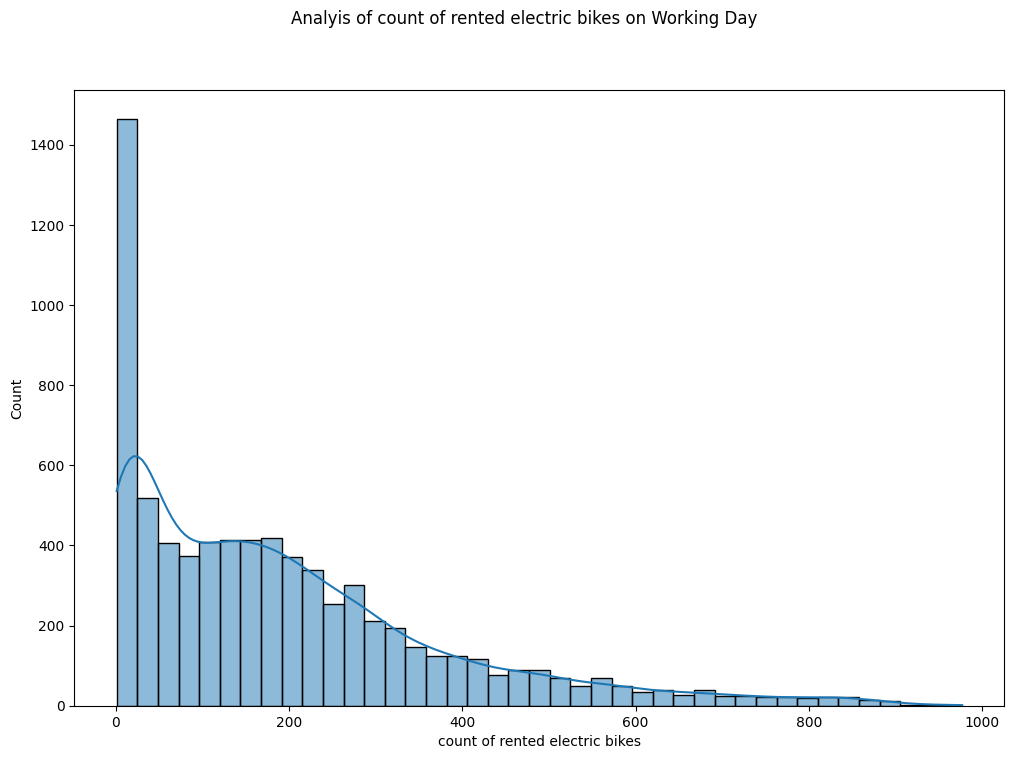

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.8751849562426889, and p-value: 1.1414411776261303e-07
Reject Ho: Data is not Normally distributed


In [46]:
# checking for the dataset's normal distribution with Wilkin-Shapiro Test

# Null Hypothesis(H0) : Data is Normally distributed
# Alternate Hypothesis(Ha) : Data is not Normally distributed

plt.figure(figsize = (12,8))
sns.histplot(working_day_df,kde=True)
plt.suptitle("Analyis of count of rented electric bikes on Working Day")
plt.xlabel("count of rented electric bikes")
plt.show()

working_day_sample_df = working_day_df.sample(100)
shapiro_stat,p_value = shapiro(working_day_sample_df)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))
if p_value < alpha:
    print("Reject Ho: Data is not Normally distributed")
else:
    print("Failed to reject Ho: Data is Normally distributed")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


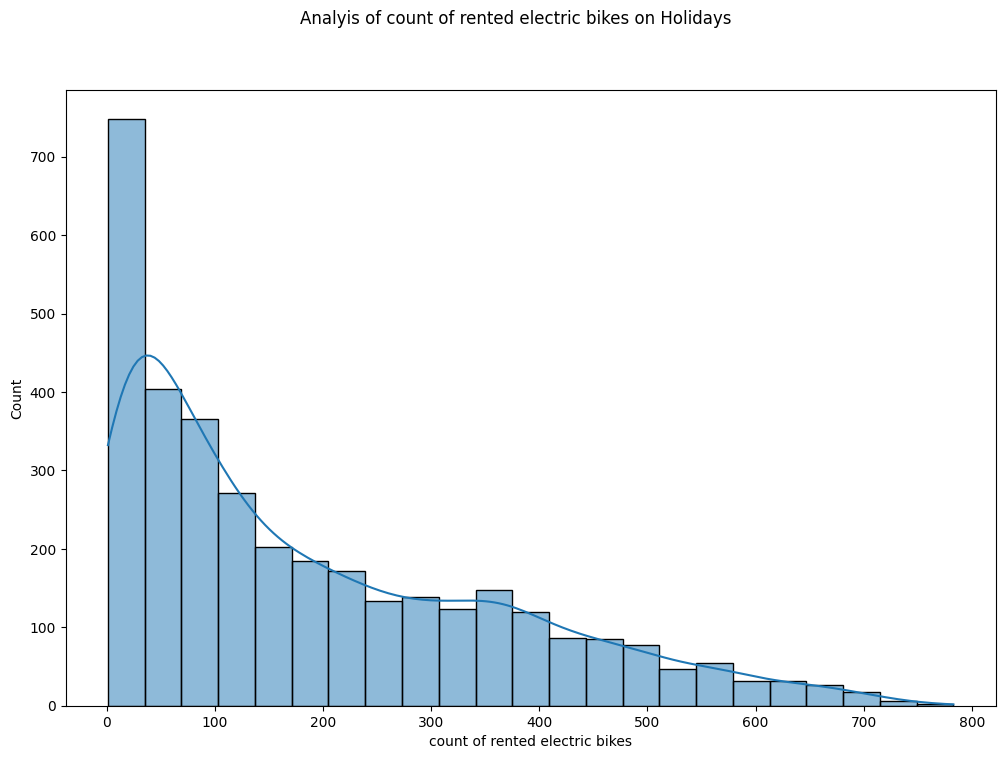

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.888599138294259, and p-value: 4.273002467542059e-07
Reject Ho: Data is not Normally distributed


In [47]:
# checking for the dataset's normal distribution with Wilkin-Shapiro Test

# Null Hypothesis(H0) : Data is Normally distributed
# Alternate Hypothesis(Ha) : Data is not Normally distributed

plt.figure(figsize = (12,8))
sns.histplot(holiday_df,kde=True)
plt.suptitle("Analyis of count of rented electric bikes on Holidays")
plt.xlabel("count of rented electric bikes")
plt.show()

holiday_sample_df = holiday_df.sample(100)
shapiro_stat,p_value = shapiro(holiday_sample_df)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))
if p_value < alpha:
    print("Reject Ho: Data is not Normally distributed")
else:
    print("Failed to reject Ho: Data is Normally distributed")

In [48]:
# Check for Equal or Similar variance among the two groups

print("Variance for Working Day group is : {}\nVariance for Non-Working Day group is : {}".format(np.var(working_day_df),np.var(holiday_df)))
print("The Ratio of the above two is : {}".format(np.var(working_day_df)/np.var(holiday_df)))

Variance for Working Day group is : 34040.697106746935
Variance for Non-Working Day group is : 30171.34609894243
The Ratio of the above two is : 1.1282458858519453


In [49]:
from scipy.stats import norm,stats,chi2_contingency,levene,kruskal,shapiro,f_oneway,ttest_ind
test_statistic,p_value = ttest_ind(working_day_df,holiday_df,alternative="greater")
print("Two Sample Independent T-Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")
if p_value < alpha:
    print("Reject Ho: Working Day has an impact on the count of rented electric cycles,i.e., count of rented electric bikes is more on working day than on holidays.")
else:
    print("Failed to reject Ho: Working Day doesn't have impact on the count of rented electric cycles,i.e., count of rented electric bikes is same as on working day than on holidays.")

Two Sample Independent T-Test with Test Statistic: 1.2096277376026694, and p-value: 0.11322402113180674
Confidence Interval: 95%
Failed to reject Ho: Working Day doesn't have impact on the count of rented electric cycles,i.e., count of rented electric bikes is same as on working day than on holidays.


** Whether Weather has an effect on the count of rented electric bikes**

In [50]:

weather_1_df = df.loc[(df["weather"]==1),"count"]
weather_2_df = df.loc[(df["weather"]==2),"count"]
weather_3_df = df.loc[(df["weather"]==3),"count"]
weather_4_df = df.loc[(df["weather"]==4),"count"]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


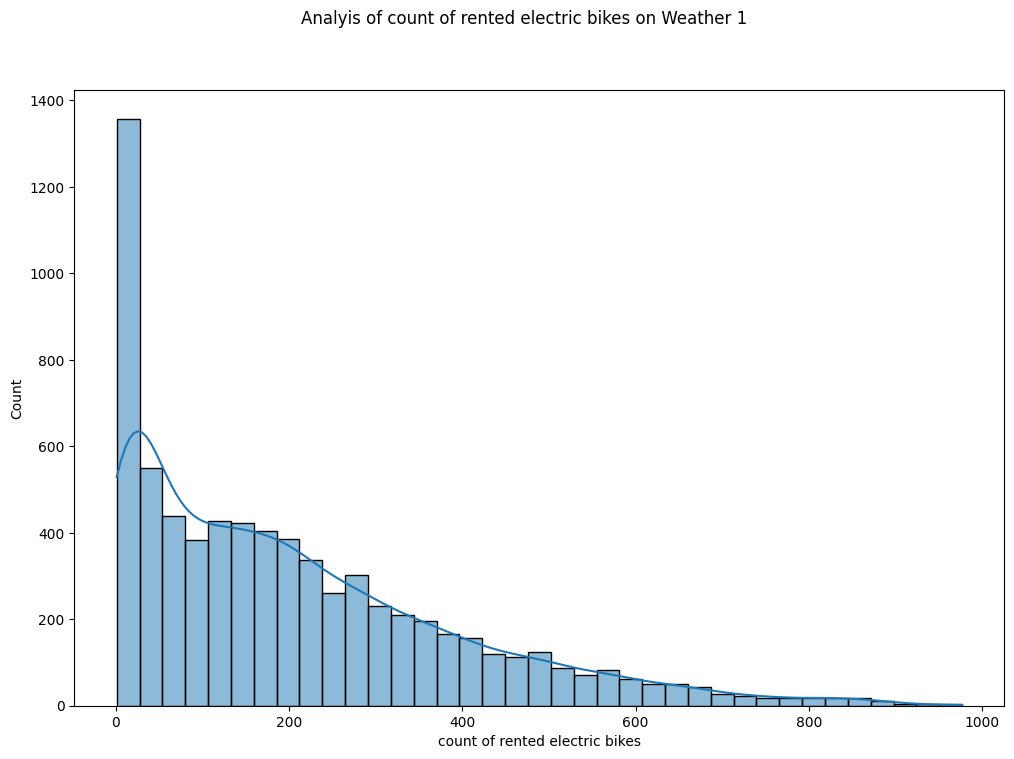

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.8981304182959771, and p-value: 1.1559569706070361e-06
Reject Ho: Data is not Normally distributed


In [51]:
# checking for the dataset's normal distribution with Wilkin-Shapiro Test

# Null Hypothesis(H0) : Data is Normally distributed
# Alternate Hypothesis(Ha) : Data is not Normally distributed

plt.figure(figsize = (12,8))
sns.histplot(weather_1_df,kde=True)
plt.suptitle("Analyis of count of rented electric bikes on Weather 1")
plt.xlabel("count of rented electric bikes")
plt.show()

weather_1_sample_df = weather_1_df.sample(100)
shapiro_stat,p_value = shapiro(weather_1_sample_df)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))
if p_value < alpha:
    print("Reject Ho: Data is not Normally distributed")
else:
    print("Failed to reject Ho: Data is Normally distributed")

In [52]:
#  Implementation of Kruskal-Wallis Test

test_statistic,p_value = kruskal(weather_1_df,weather_2_df,weather_3_df,weather_4_df)
print("Kruskal-Wallis Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")
if p_value < alpha:
    print("Reject Ho: Weather does have impact on the count of rented electric bikes,i.e., No. of bikes is different in different weather.")
else:
    print("Failed to reject Ho: Weather doesn't have impact on the count of rented electric bikes,i.e., No. of bikes is same in different weather")

Kruskal-Wallis Test with Test Statistic: 205.00216514479087, and p-value: 3.501611300708679e-44
Confidence Interval: 95%
Reject Ho: Weather does have impact on the count of rented electric bikes,i.e., No. of bikes is different in different weather.


In [53]:
test_statistic,p_value = f_oneway(weather_1_df,weather_2_df,weather_3_df,weather_4_df)
print("Kruskal-Wallis Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")
if p_value < alpha:
    print("Reject Ho: Weather does have impact on the count of rented electric bikes,i.e., No. of bikes is different in different weather.")
else:
    print("Failed to reject Ho: Weather doesn't have impact on the count of rented electric bikes,i.e., No. of bikes is same in different weather")

Kruskal-Wallis Test with Test Statistic: 65.53024112793271, and p-value: 5.482069475935669e-42
Confidence Interval: 95%
Reject Ho: Weather does have impact on the count of rented electric bikes,i.e., No. of bikes is different in different weather.


Analysis and Explanation--
We have created four different datasets for each weather from the final_df. After this, we have checked the data for normality in the distribution using Wilkin-Shapiro test, unfortunately, the data doesn't follow normal distribution. We also checked for the assumption for equal variance among these groups using Levene's test. We found that variance among the groups are not equal.



We have set-up the Null and Alternate hypothesis, as these data have more than two categories and the data is not normal for each seasons and variance among the groups are also not equal, this violates the assumptions of ANOVA. Therefore, we have used Kruskal-Wallis Test on the data and checked the result with 95% confidence interval. We also used ANOVA (f_oneway) on the data


We found in both the tests that: Since p-value is less than the significance level of 0.05, we can reject the null hypothesis and can conclude that Weather does have impact on the count of rented electric bikes,i.e., No. of bikes is different in different weather.

**Business Insights¶---

Customers mostly rent these electric bikes during clear or cloudy weather, majorly during January to August. This can help business to provide and make available of bikes during these times, at least seasons.

It is observed that whenever there is rain, thunderstorm, snow or fog, less number bikes were rented. Also, when the humidity is less than 20, number of bikes rented is very very low

Similarly, whenever the temperature is less than 10, number of bikes rented is less and when the windspeed is greater than 35, number of his rented is also low.

Registered users and casual riders seems to have different mentality for renting these bikes, as registered ones prefer renting on working non-holidays, mostly during office start and end hours, while casual riders rent most on holidays. This segregation can be used to cater the needs of different type of consumers, like providing more number of bikes during these peak hours.

Registered riders are significantly more than casual riders. This provides a good insight regarding the business's customer retention and their services.

Proven by hypothesis testing, we can conclude that weather does depend on the season, which can be stated obvious. Moreover, weather and season do impact the numbers of rented bikes during these times.





Recommendations---


In summer and fall seasons, during clear or cloudy weather, the company should have more bikes in stock to be rented, as the demand during these seasons is higher as compared to other seasons.

With a significance level of 0.05, working day does have effect on the number of bikes being rented. Therefore, it will be wise to put more bikes on roads to cater the needs of consumers (for registered ones). A nominal count of bikes available during holidays will cater the needs of casual riders.

As mentioned above, days when temperature is less than 10, company should take out bikes from roads for maintenance, this will provide ample time for repairs.

Similarly, days when windspeed is greater than 35 or in thunderstorms, company should take out bikes from roads for maintenance.**